In [1]:
import numpy as np

'''
1. 가중치 제거 vs 0으로 설정
가중치 제거: 가중치를 완전히 제거하는 방식은 네트워크의 구조를 변경하여 더 작은 네트워크를 만드는 것을 의미합니다. 그러나, 이 방식은 구현이 복잡하고, 네트워크의 성능에 큰 영향을 미칠 수 있습니다.
0으로 설정: 가중치를 0으로 설정하는 방식은 네트워크의 구조를 변경하지 않고, 단순히 가중치를 0으로 설정하는 것을 의미합니다. 이 방식은 구현이 간단하고, 네트워크의 성능에 미치는 영향을 최소화할 수 있습니다.
2. 0으로 설정의 장점
구현의 간단함: 가중치를 0으로 설정하는 방식은 구현이 간단합니다. 단순히 가중치를 0으로 설정하면 되기 때문입니다.
성능의 안정성: 가중치를 0으로 설정하는 방식은 네트워크의 성능에 미치는 영향을 최소화할 수 있습니다. 가중치를 0으로 설정하면, 해당 가중치는 더 이상 사용되지 않기 때문입니다.
'''

# 원본 가중치
original_weights = np.array([0.2, -0.5, 0.1, 0.0, 0.3, -0.2])

# 작은 가중치를 pruning (크기가 0.1보다 작은 경우 0으로 처리)
pruned_weights = np.where(np.abs(original_weights) < 0.1, 0, original_weights)

# 결과
print("원본 가중치:", original_weights)
print("Pruning된 가중치:", pruned_weights)

원본 가중치: [ 0.2 -0.5  0.1  0.   0.3 -0.2]
Pruning된 가중치: [ 0.2 -0.5  0.1  0.   0.3 -0.2]


In [4]:
# 작은 가중치를 pruning (크기가 0.2보다 작은 경우 0으로 처리)
pruned_weights = np.where(np.abs(original_weights) < 0.2, 0, original_weights)

# 결과
print("원본 가중치:", original_weights)
print("Pruning된 가중치:", pruned_weights)

원본 가중치: [ 0.2 -0.5  0.1  0.   0.3 -0.2]
Pruning된 가중치: [ 0.2 -0.5  0.   0.   0.3 -0.2]


In [5]:
'''
1. 미세 가지치기 (Fine-Grain Pruning)
정의: 미세 가지치기는 개별 가중치를 제거하는 방식입니다. 이는 가중치를 0으로 설정하여 네트워크를 sparse하게 만드는 것을 포함합니다.
장점: 미세 가지치기는 매우 유연한 방식으로, 불필요한 가중치를 자유롭게 제거할 수 있어 압축 비율이 높아집니다2.
단점: 미세 가지치기는 하드웨어에서 가속화하기 어렵습니다. 특히 GPU에서 작업이 불규칙하게 이루어지기 때문에 병렬화가 힘들어집니다2.
2. 채널 가지치기 (Channel Pruning)
정의: 채널 가지치기는 전체 채널을 제거하는 방식입니다. 이는 네트워크의 구조를 변경하여 더 작은 네트워크를 만드는 것을 포함합니다.
장점: 채널 가지치기는 채널 수가 줄어듦으로써 네트워크의 크기를 줄일 수 있습니다. 또한, 기존의 하드웨어에서도 별도의 특수 하드웨어 없이 가속할 수 있습니다1.
단점: 채널 가지치기는 압축 비율이 낮을 수밖에 없습니다. 이는 전체 채널을 제거하는 방식이기 때문에, 네트워크의 크기를 줄이지만 압축 비율이 낮아집니다1.
'''

'\n1. 미세 가지치기 (Fine-Grain Pruning)\n정의: 미세 가지치기는 개별 가중치를 제거하는 방식입니다. 이는 가중치를 0으로 설정하여 네트워크를 sparse하게 만드는 것을 포함합니다.\n장점: 미세 가지치기는 매우 유연한 방식으로, 불필요한 가중치를 자유롭게 제거할 수 있어 압축 비율이 높아집니다2.\n단점: 미세 가지치기는 하드웨어에서 가속화하기 어렵습니다. 특히 GPU에서 작업이 불규칙하게 이루어지기 때문에 병렬화가 힘들어집니다2.\n2. 채널 가지치기 (Channel Pruning)\n정의: 채널 가지치기는 전체 채널을 제거하는 방식입니다. 이는 네트워크의 구조를 변경하여 더 작은 네트워크를 만드는 것을 포함합니다.\n장점: 채널 가지치기는 채널 수가 줄어듦으로써 네트워크의 크기를 줄일 수 있습니다. 또한, 기존의 하드웨어에서도 별도의 특수 하드웨어 없이 가속할 수 있습니다1.\n단점: 채널 가지치기는 압축 비율이 낮을 수밖에 없습니다. 이는 전체 채널을 제거하는 방식이기 때문에, 네트워크의 크기를 줄이지만 압축 비율이 낮아집니다1.\n'

In [7]:
# 원본 가중치 (3x3 커널, 3개의 출력 채널, 2개의 입력 채널)
original_weights = np.random.rand(3, 3, 3, 2)

# 미세 가지치기 (크기가 0.1보다 작은 경우)
fine_grain_pruned_weights = np.where(np.abs(original_weights) < 0.1, 0, original_weights)

# 채널 가지치기 (2번째 입력 채널을 제거)
channel_pruned_weights = np.delete(original_weights, 1, axis=3)

# 결과
print("원본 가중치:", original_weights)

원본 가중치: [[[[0.18979483 0.57330719]
   [0.94226222 0.10781055]
   [0.32970678 0.70236143]]

  [[0.43573193 0.76942613]
   [0.70546028 0.33398331]
   [0.51795816 0.77743764]]

  [[0.43340057 0.30646537]
   [0.03570792 0.31461193]
   [0.00934329 0.63722549]]]


 [[[0.7190841  0.07678016]
   [0.59919261 0.72542146]
   [0.75850934 0.29582978]]

  [[0.39645259 0.80566217]
   [0.28268332 0.71261415]
   [0.4744531  0.59079308]]

  [[0.09447724 0.1037672 ]
   [0.41585852 0.06085993]
   [0.56852805 0.56077676]]]


 [[[0.94465772 0.51534978]
   [0.10154653 0.9064323 ]
   [0.22257185 0.4744088 ]]

  [[0.72258556 0.14493024]
   [0.48795444 0.49195408]
   [0.84037233 0.35538185]]

  [[0.91346054 0.81346059]
   [0.26395469 0.40927704]
   [0.6705853  0.08254477]]]]


In [12]:
print("미세 가지치기된 가중치:", fine_grain_pruned_weights, "\nshape: ", fine_grain_pruned_weights.shape)

미세 가지치기된 가중치: [[[[0.18979483 0.57330719]
   [0.94226222 0.10781055]
   [0.32970678 0.70236143]]

  [[0.43573193 0.76942613]
   [0.70546028 0.33398331]
   [0.51795816 0.77743764]]

  [[0.43340057 0.30646537]
   [0.         0.31461193]
   [0.         0.63722549]]]


 [[[0.7190841  0.        ]
   [0.59919261 0.72542146]
   [0.75850934 0.29582978]]

  [[0.39645259 0.80566217]
   [0.28268332 0.71261415]
   [0.4744531  0.59079308]]

  [[0.         0.1037672 ]
   [0.41585852 0.        ]
   [0.56852805 0.56077676]]]


 [[[0.94465772 0.51534978]
   [0.10154653 0.9064323 ]
   [0.22257185 0.4744088 ]]

  [[0.72258556 0.14493024]
   [0.48795444 0.49195408]
   [0.84037233 0.35538185]]

  [[0.91346054 0.81346059]
   [0.26395469 0.40927704]
   [0.6705853  0.        ]]]] 
shape:  (3, 3, 3, 2)


In [11]:
print("채널 가지치기된 가중치:", channel_pruned_weights, "\n채널 shape: ", channel_pruned_weights.shape)

채널 가지치기된 가중치: [[[[0.18979483]
   [0.94226222]
   [0.32970678]]

  [[0.43573193]
   [0.70546028]
   [0.51795816]]

  [[0.43340057]
   [0.03570792]
   [0.00934329]]]


 [[[0.7190841 ]
   [0.59919261]
   [0.75850934]]

  [[0.39645259]
   [0.28268332]
   [0.4744531 ]]

  [[0.09447724]
   [0.41585852]
   [0.56852805]]]


 [[[0.94465772]
   [0.10154653]
   [0.22257185]]

  [[0.72258556]
   [0.48795444]
   [0.84037233]]

  [[0.91346054]
   [0.26395469]
   [0.6705853 ]]]] 
채널 shape:  (3, 3, 3, 1)


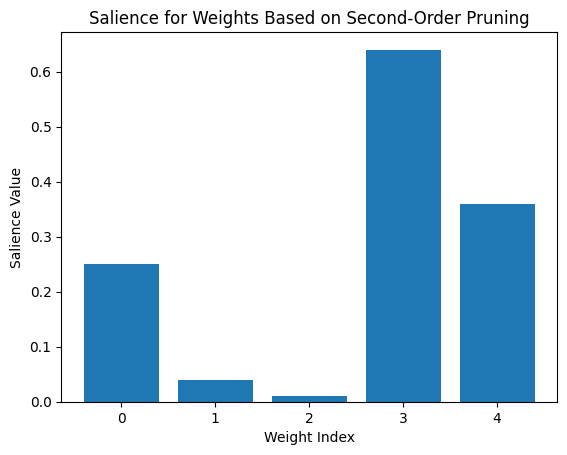

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 손실 함수를 시뮬레이션하는 함수 정의
def loss_function(weights):
    return np.sum(weights**2)  # 단순 제곱 손실 함수

# Hessian 계산
def hessian(weights):
    return 2 * np.eye(len(weights))  # 예로써 단순 대각 Hessian

# Pruning을 위해 첫 번째 시냅스를 선택
def second_order_pruning(weights):
    H = hessian(weights)  # Hessian 계산
    H_inv = np.linalg.inv(H)  # Hessian의 역행렬 계산
    salience = np.zeros(len(weights))
    for i in range(len(weights)):
        salience[i] = weights[i]**2 / (2 * H_inv[i, i])  # Selector of saliency
    return salience

# 초기 가중치 설정
weights = np.array([0.5, -0.2, 0.1, -0.8, 0.6])

# Salience 계산
salience = second_order_pruning(weights)

# 결과는 pruning된 가중치의 중요도를 나타내는 salience 값으로 표현됩니다.
# Salience value가 크다는 것은 해당 가중치가 네트워크의 성능에 중요한 역할을 한다는 것을 의미합니다. 
# 따라서, salience value가 큰 가중치는 남기고, 작은 가중치는 pruning하여 제거하는 것이 일반적입니다. 
# 이렇게 하면 네트워크의 성능을 최대한 유지하면서 불필요한 가중치를 줄일 수 있습니다.
plt.bar(range(len(weights)), salience)
plt.title('Salience for Weights Based on Second-Order Pruning')
plt.xlabel('Weight Index')
plt.ylabel('Salience Value')
plt.show()
